Analysis: Sleep Quality and Blood Pressure

Danh Dang

2025-03-19

# Introduction
Data Source: Kaggle - Sleep Health and Lifestyle Dataset by Laksika Tharmalingam

Sleep is a process that allows your body to rest, repair and restore itself. On average, depends on a person’s constitution, we need from six to eight hours of sleep everyday. More or less than that will usually come with negative effects on the body. In this section, we will learn more about the effect of sleep on blood pressure, by analyzing the data below.

In the Sleep Health and Lifestyle Dataset, there are information about the quality of sleep of hundreds of individuals, as well as their corresponding blood pressure and other information. Below are the variables used in the dataset:

1. Person ID: An identifier for each individual.
2. Gender: The gender of the person (Male/Female).
3. Age: The age of the person in years.
4. Occupation: The occupation or profession of the person.
5. Sleep Duration (hours): The number of hours the person sleeps per day.
6. Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
7. Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
8. Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
9. BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
10. Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
11. Heart Rate (bpm): The resting heart rate of the person in beats per minute.
12. Daily Steps: The number of steps the person takes per day.
13. Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

The part below will describe the though process which was used to arrive at the conclusion. Note that this dataset was not collected by a formal procedure, may not reflect real life scenario, and can only be used for education purposes (training, in this case).

# Analysis
First, we load the packages and dataset

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

data = pd.read_csv(r"kaggle-dataset.csv")

This dataset has 13 variables and 374 observations.

In [2]:
data.shape

(374, 13)

In [3]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

We will remove Person ID since we are not going to use it for the analysis.

In [4]:
data = data.drop("Person ID", axis = 1)

We will now look out for NA in the dataset. It turns out that Sleep Disorder has 219 NAs, which indicates that the patients do not have any disorders. We will fill those NAs with "No Disorder" value.

In [5]:
data.isna().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [6]:
data["Sleep Disorder"] = data["Sleep Disorder"].fillna("No Disorder")

We change the variables to ease the analytical process.

In [7]:
data.columns = ["gender", "age", "occupation", "sleep_dur", "sleep_qual", "phys_level", "stress_level", "bmi_cat", "blood_pres", 
                "heart_rate", "steps", "sleep_disorder"]

We will now summarize the statistics of variables with numerical values.

In [8]:
round(data.describe(),2)

,age,sleep_dur,sleep_qual,phys_level,stress_level,heart_rate,steps
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,42.18,7.13,7.31,59.17,5.39,70.17,6816.84
std,8.67,0.80,1.20,20.83,1.77,4.14,1617.92
min,27.00,5.80,4.00,30.00,3.00,65.00,3000.00
25%,35.25,6.40,6.00,45.00,4.00,68.00,5600.00
50%,43.00,7.20,7.00,60.00,5.00,70.00,7000.00
75%,50.00,7.80,8.00,75.00,7.00,72.00,8000.00
max,59.00,8.50,9.00,90.00,8.00,86.00,10000.00


We will check the correlation between those numerical variables.

In [9]:
cor_var = data.describe().columns
data[cor_var].corr()

,age,sleep_dur,sleep_qual,phys_level,stress_level,heart_rate,steps
age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
sleep_dur,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
sleep_qual,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
phys_level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
stress_level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
heart_rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


We will now check to see whether patient's sleep duration change based on their gender or occupation. These information might be important for later use.

In [154]:
pd.DataFrame(round(data.groupby("gender")["sleep_dur"].mean(),2))

,sleep_dur
gender,
Female,7.23
Male,7.04


In [157]:
pd.DataFrame(round(data.groupby("occupation")["sleep_dur"].mean(),2)).sort_values(by = "sleep_dur")

,sleep_dur
occupation,
Sales Representative,5.90
Scientist,6.00
Salesperson,6.40
Teacher,6.69
Software Engineer,6.75
Manager,6.90
Doctor,6.97
Nurse,7.06
Accountant,7.11


As expected, Stress level is highly correlated with Age, Sleep duration and Sleep quality, as well as Heart rate. Out of these variables, Sleep duration and Sleep quality is correlated to eachother.
We will now split blood pressure into systolic and diastolic variables.

In [10]:
data["systolic"] = data["blood_pres"].str.split("/").str[0].astype('int64')
data["diastolic"] = data["blood_pres"].str.split("/").str[1].astype('int64')


Patients are categorized based on the values of their systolic and diastolic. The categories are Normal, Elevated, Hypertension Stage 1, Hypertension Stage 2 and Crisis.

In [11]:
data["blood_pres_c"] = np.where((data["systolic"] > 180) | (data["diastolic"] > 120), "Crisis",
                                np.where((data["systolic"] >= 140) | (data["diastolic"] >= 90), "Stage 2", 
                                np.where((data["systolic"] >= 130) | (data["diastolic"] >= 80), "Stage 1",
                                np.where((data["systolic"] >= 120) & (data["diastolic"] < 80), "Elevated", "Normal"))))

In our data, there are no observation with “Crisis” category, which aligns with the range of values in both the systolic and diastolic variables (the highest value of systolic is 142, while the highest value of diastolic is 95).

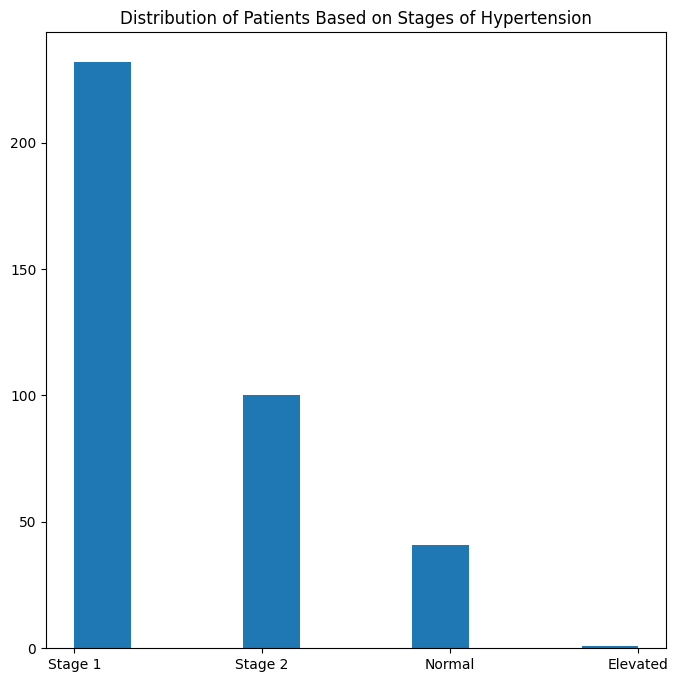

In [158]:
fig, ax = subplots(figsize = (8,8))
ax.hist(data["blood_pres_c"])
ax.set_title("Distribution of Patients Based on Stages of Hypertension");

Note that in our dataset, the number of individuals belong to each category is not equal. There are more than 250 people with stage 1 category, while barely anyone belong to the elevated group. We should keep this result in mind as the analysis of elevated group might not be accurate. We will now see whether there is a correlation between the sleep duration and blood pressure. The result of the analysis will be visualized below:

''

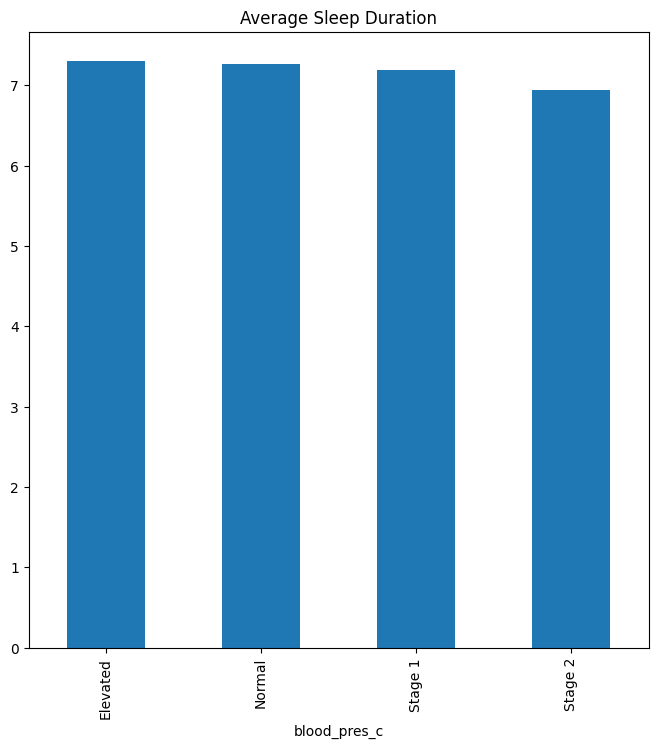

In [159]:
group_by = data.groupby("blood_pres_c")["sleep_dur"].mean()
fig, ax = subplots(figsize = (8,8))
draw = pd.DataFrame(group_by, index = None)
draw.plot.bar(ax = ax)
ax.set_title("Average Sleep Duration")
ax.get_legend().remove()
;

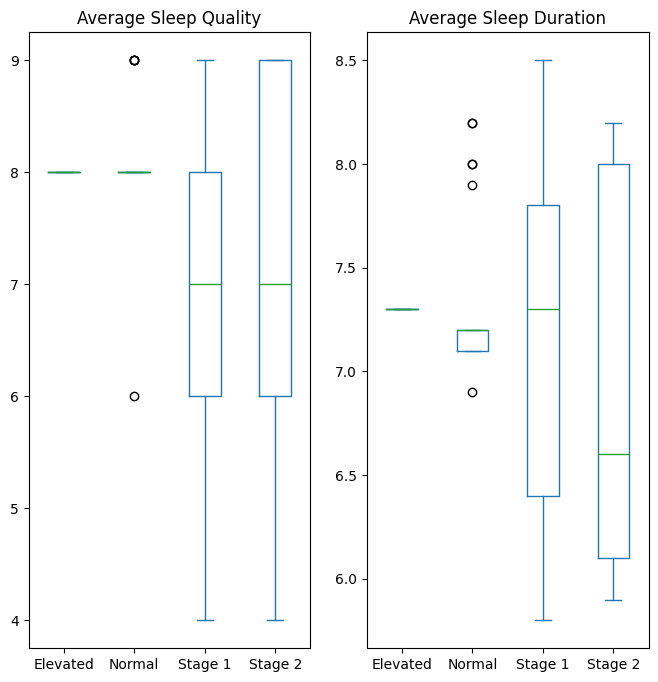

In [160]:
fig, axes = subplots(ncols = 2, figsize = (8,8))
data.plot.box(column = "sleep_qual", by = "blood_pres_c", ax = axes[0])
data.plot.box(column = "sleep_dur", by = "blood_pres_c", ax = axes[1])
axes[0].set_title("Average Sleep Quality")
axes[1].set_title("Average Sleep Duration");

As we can see, at first, it seems like there is little correlation between the blood pressure and the duration of sleep (on average, the amount of sleep for each category is around 7 hours). However, when we use box plot on the data, the median is much lower for individuals with stage 2 hypertension (around 6.6 hours of sleep), 0.7 hours less than the other categories. The box plot also points out that other factors might affect the blood pressure, as a significant number still have enough sleep every night. Now we want to check the quality of sleep instead of the duration.

''

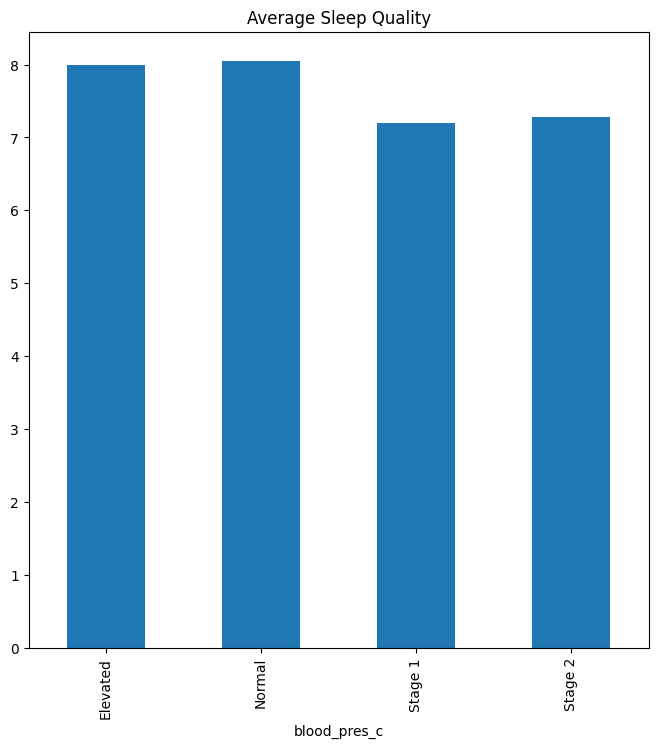

In [148]:
group_by = data.groupby("blood_pres_c")["sleep_qual"].mean()
fig, ax = subplots(figsize = (8,8))
draw = pd.DataFrame(group_by, index = None)
draw.plot.bar(ax = ax)
ax.set_title("Average Sleep Quality")
ax.get_legend().remove()
;

It appears that the quality of sleep is a more accurate measure, as stage 1 and stage 2 categories both have lower average and lower median values. Next, we want to see what effect does stress have on blood pressure. Stress is known as a factor for higher blood pressure.

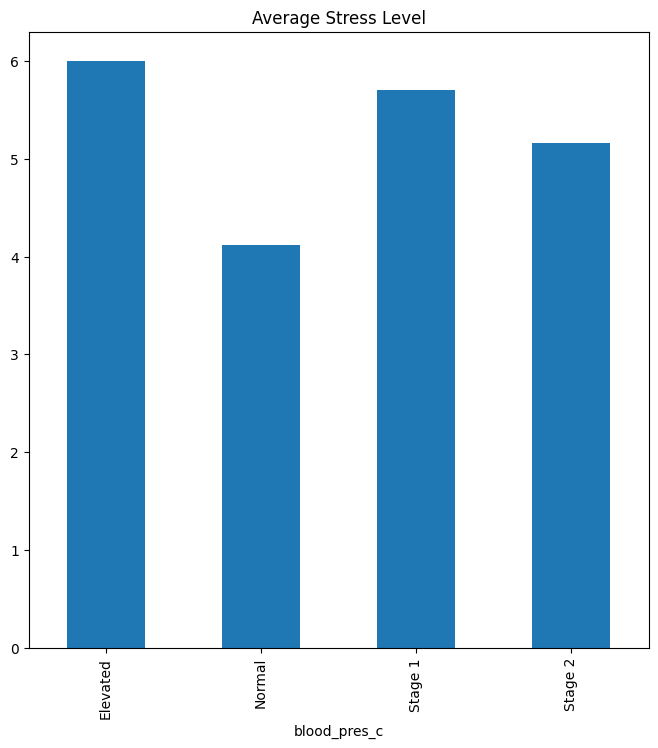

In [144]:
fig, ax = subplots(figsize = (8,8))
group_by = data.groupby("blood_pres_c")["stress_level"].mean()
draw = pd.DataFrame(group_by)
draw.plot.bar(ax = ax)
ax.set_title("Average Stress Level")
ax.get_legend().remove();

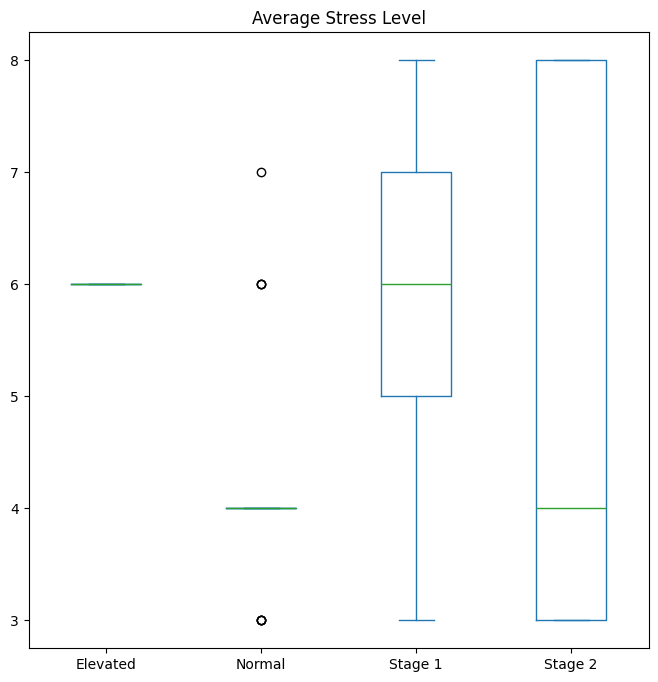

In [143]:
fig, ax = subplots(figsize = (8,8))
data.plot.box(by = "blood_pres_c", column = "stress_level", ax = ax)
ax.set_title("Average Stress Level");

As we can see from the plots above, individuals with lower blood pressure tend to have lower level of stress. However, the high fluctuation for stage 2 hypertension in the box plot indicates the presence of other factors. Lastly, we want to see if physical activity has any effect on the blood pressure.

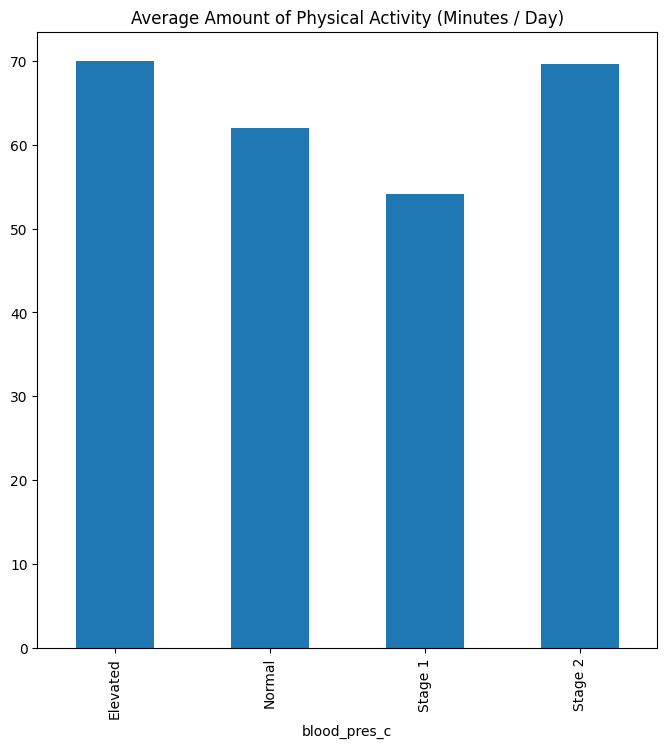

In [142]:
fig, ax = subplots(figsize = (8,8))
group_by = data.groupby("blood_pres_c")["phys_level"].mean()
draw = pd.DataFrame(group_by)
draw.plot.bar(ax = ax)
ax.set_title("Average Amount of Physical Activity (Minutes / Day)")
ax.get_legend().remove();

Text(0.5, 1.0, 'Average Amount of Physical Activity (Minutes / Day)')

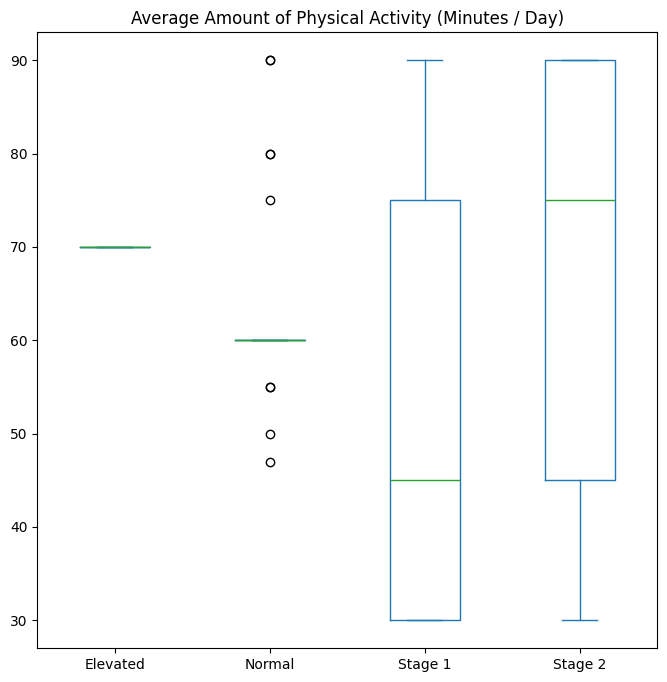

In [141]:
fig, ax = subplots(figsize = (8,8))
data.plot.box(by = "blood_pres_c", column = "phys_level", ax = ax)
ax.set_title("Average Amount of Physical Activity (Minutes / Day)")

Unexpectedly, people belong to the stage 2 category exercise the most out of the four groups. The result might point out that we need a moderate amount of physical activity everyday to stay healthy.

Now that we have seen the correlation between blood pressure and some key factors, we will now dive further into gender, occupations and age. First is gender.

''

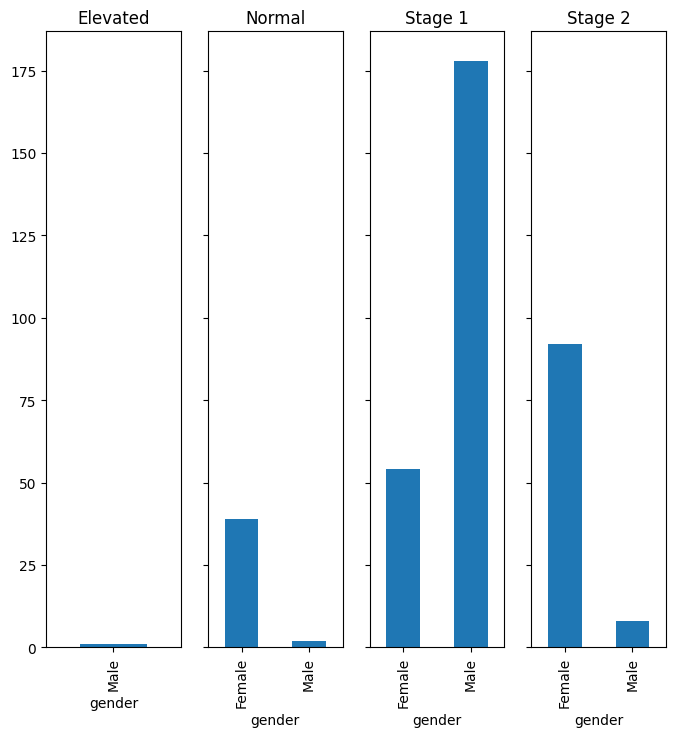

In [ ]:
group_by = data.groupby(["blood_pres_c", "gender"])["age"].count()
draw = pd.DataFrame(group_by).reset_index("blood_pres_c").rename(columns = {"age" : "count"})
draw_list = []
h_type = pd.unique(draw["blood_pres_c"])
for c in h_type:
    draw_list.append(draw[draw["blood_pres_c"] == c])
fig, axes = subplots(figsize = (8,8), ncols = 4, sharey = 200)
for f in range(len(draw_list)):
    draw_list[f].plot.bar(ax = axes[f])
    axes[f].get_legend().remove()
    axes[f].set_title(h_type[f])
;


We can see that most of the male individuals in the dataset have stage 1 hypertension. Female, on ther other hand, is more well-distributed. However, a significant number belong to the stage 2 hypertension, a lot higher than male. Next is occupation.

''

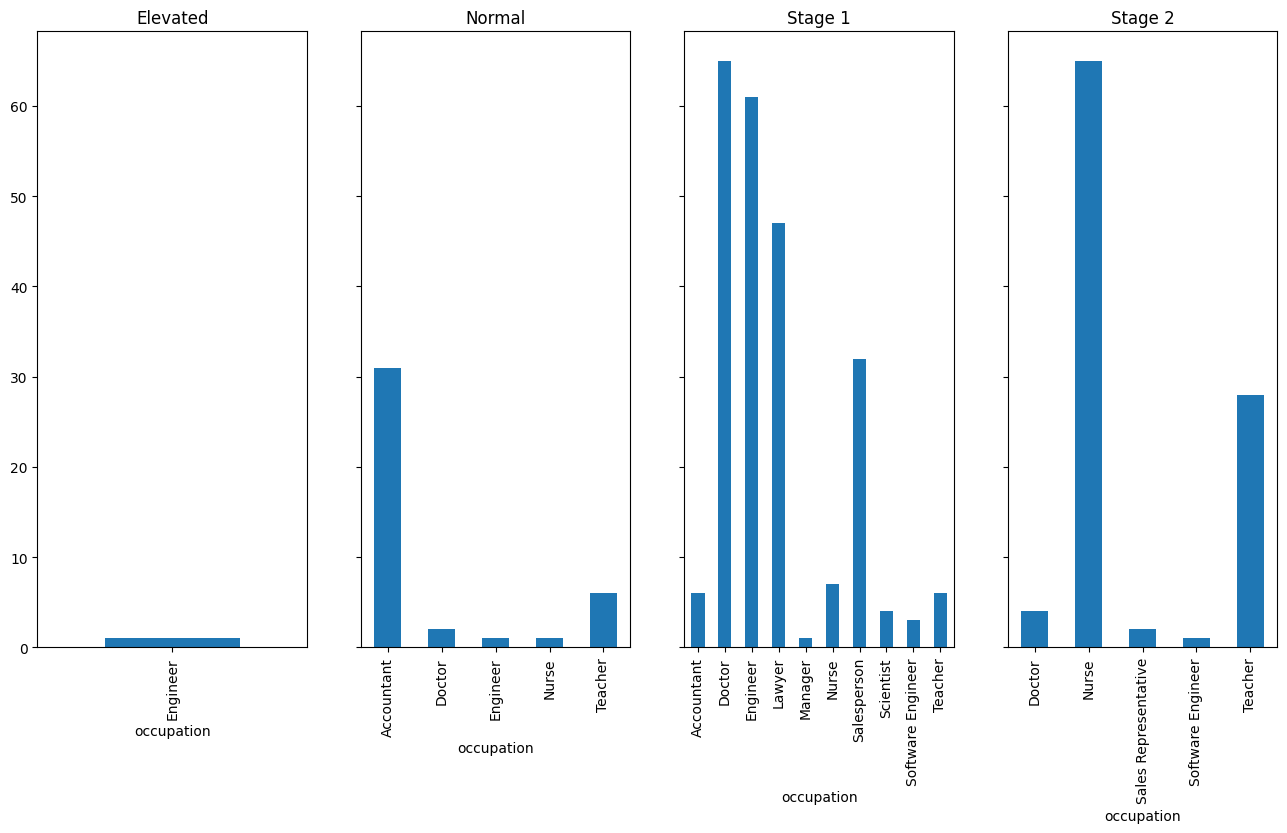

In [140]:
group_by = data.groupby(["blood_pres_c", "occupation"]).count()["age"]
draw = pd.DataFrame(group_by).reset_index("blood_pres_c").rename(columns = {"age" : "count"})
h_type = pd.unique(draw["blood_pres_c"])
draw_list = []
for c in h_type:
    draw_list.append(draw[draw["blood_pres_c"] == c])
fig, axes = subplots(figsize = (16,8), ncols = len(draw_list), sharey = 70)
for f in range(len(draw_list)):
    draw_list[f].plot.bar(ax = axes[f])
    axes[f].get_legend().remove()
    axes[f].set_title(h_type[f])
;

The bar chart above shows interesting results. Accountant seems to have the easiest time out of all occupation, as most of them have normal blood pressure. A significant number of doctor, engineer, lawyer and salesperson belong to the stage 1 group. Surprisingly, most of those in stage 2 category are nurses and teachers. The result might indicate that the amount of workload and responsibility might also affect the blood pressure of each individual. Last is the age variable. Here, we will split them into several bins, within which is 5 years of age.

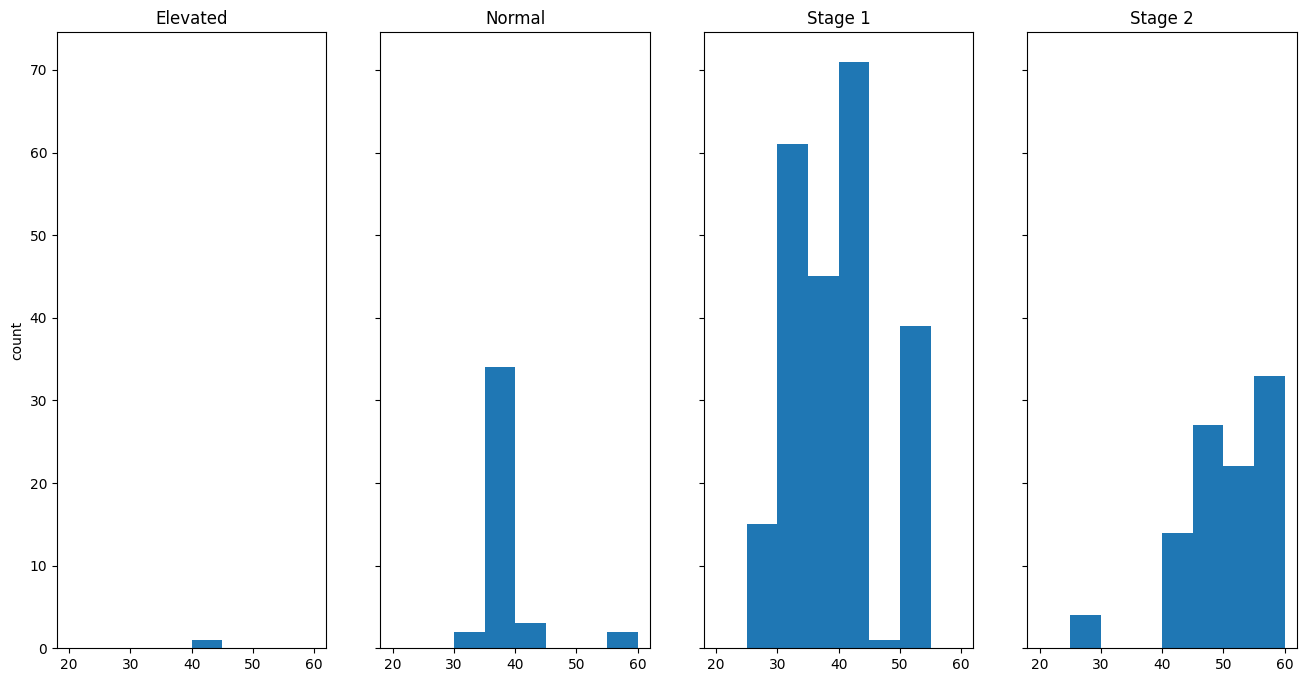

In [134]:
fig, axes = subplots(figsize = (16,8), ncols = 4, sharey = 60)
for c in range(len(h_type)):
    type = h_type[c]
    data[data["blood_pres_c"] == type]["age"].plot.hist(ax = axes[c], range = (20,60), bins = 8)
    axes[c].set_title(type)
    axes[c].set_ylabel("count")

The result is expected. The group with normal blood pressure tends to be younger than the group with stage 2 hypertension. However, unexpectedly, within the stage 1 category, the distribution of age seem to be slightly lean to the younger side of the chart.

# Conclusion
1. Sleep seems to have an effect on blood pressure. However, the evidences are not clear enough and more observations are required to draw a better conclusion. Note that the quality of sleep appears to be a better factor than the duration.
2. Stress level and physical activities both have an effect on blood pressure.
3. Evidences have pointed out that, while the factors affect the blood pressure, there might be other reasons that assign individuals to the stage 2 category.
4. Most males belong to the stage 1 hypertension. Females are better distributed. However, a significant number of people in the stage 2 category are female.
5. Younger people tend to have lower blood pressure. People of the age of 30 or above have high risk of getting high blood pressure diagnosis.
6. People with certain occupations might have higher chance of belonging to one of the four category above.

# Future Questions
1. What factor might give people higher risk of getting stage 2 hypertension?
2. Why do certain occupations have higher risk of high blood pressure? Is it because of the workload or the responsibility that they have?
3. Why is there a difference in distribution of the gender variable? Is it because of the culture, or other social factors?